# **Diabetes Dataset Analysis Project**
In this project we analyze the various data entries found in the CDC Diabetes Dataset. The initial load of the dataset is found below:

In [2]:
from ucimlrepo import fetch_ucirepo

cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

x = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

#### The code below allows us to visualize each of the attributes found in the dataset, their data type, their description, and whether or not they contain missing values.

In [4]:
print(cdc_diabetes_health_indicators.variables)

                    name     role     type      demographic  \
0                     ID       ID  Integer             None   
1        Diabetes_binary   Target   Binary             None   
2                 HighBP  Feature   Binary             None   
3               HighChol  Feature   Binary             None   
4              CholCheck  Feature   Binary             None   
5                    BMI  Feature  Integer             None   
6                 Smoker  Feature   Binary             None   
7                 Stroke  Feature   Binary             None   
8   HeartDiseaseorAttack  Feature   Binary             None   
9           PhysActivity  Feature   Binary             None   
10                Fruits  Feature   Binary             None   
11               Veggies  Feature   Binary             None   
12     HvyAlcoholConsump  Feature   Binary             None   
13         AnyHealthcare  Feature   Binary             None   
14           NoDocbcCost  Feature   Binary             

<br><br>

---

## Data quality analysis via a boxplot

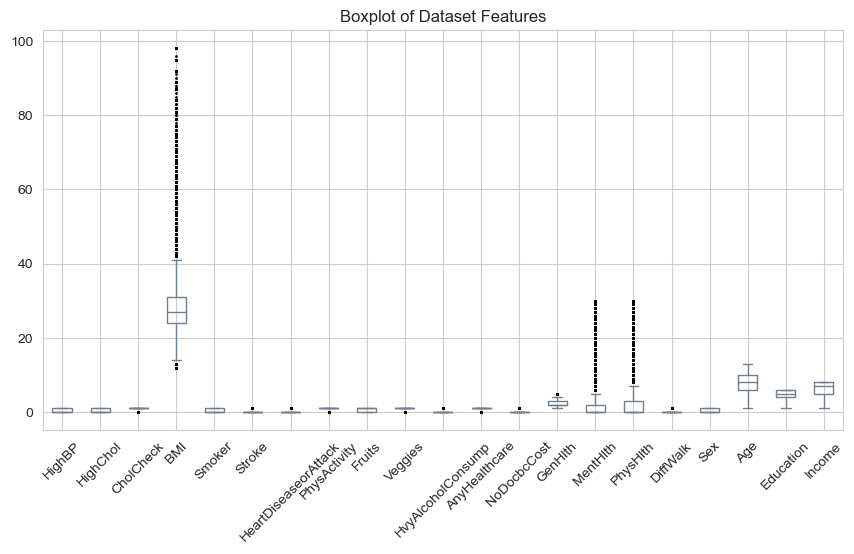

In [15]:
import matplotlib.pyplot as plt

numerical_columns = x.columns

numerical_columns = [col for col in numerical_columns]

data = [x[column].dropna() for column in numerical_columns]

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

axes.boxplot(data,
             boxprops=dict(color='slategrey', linewidth=1.0),
             whiskerprops=dict(color='slategrey', linewidth=1.0),
             capprops=dict(color='slategrey', linewidth=1.0),
             flierprops=dict(marker='o', markerfacecolor='red', markersize=1),
             medianprops=dict(color='slategrey', linewidth=1))

plt.title('Boxplot of Dataset Features')
plt.xticks(range(1, len(numerical_columns) + 1), numerical_columns, rotation=45)

plt.show()

<br><br>

---

## Correlation analysis with correlation matrix

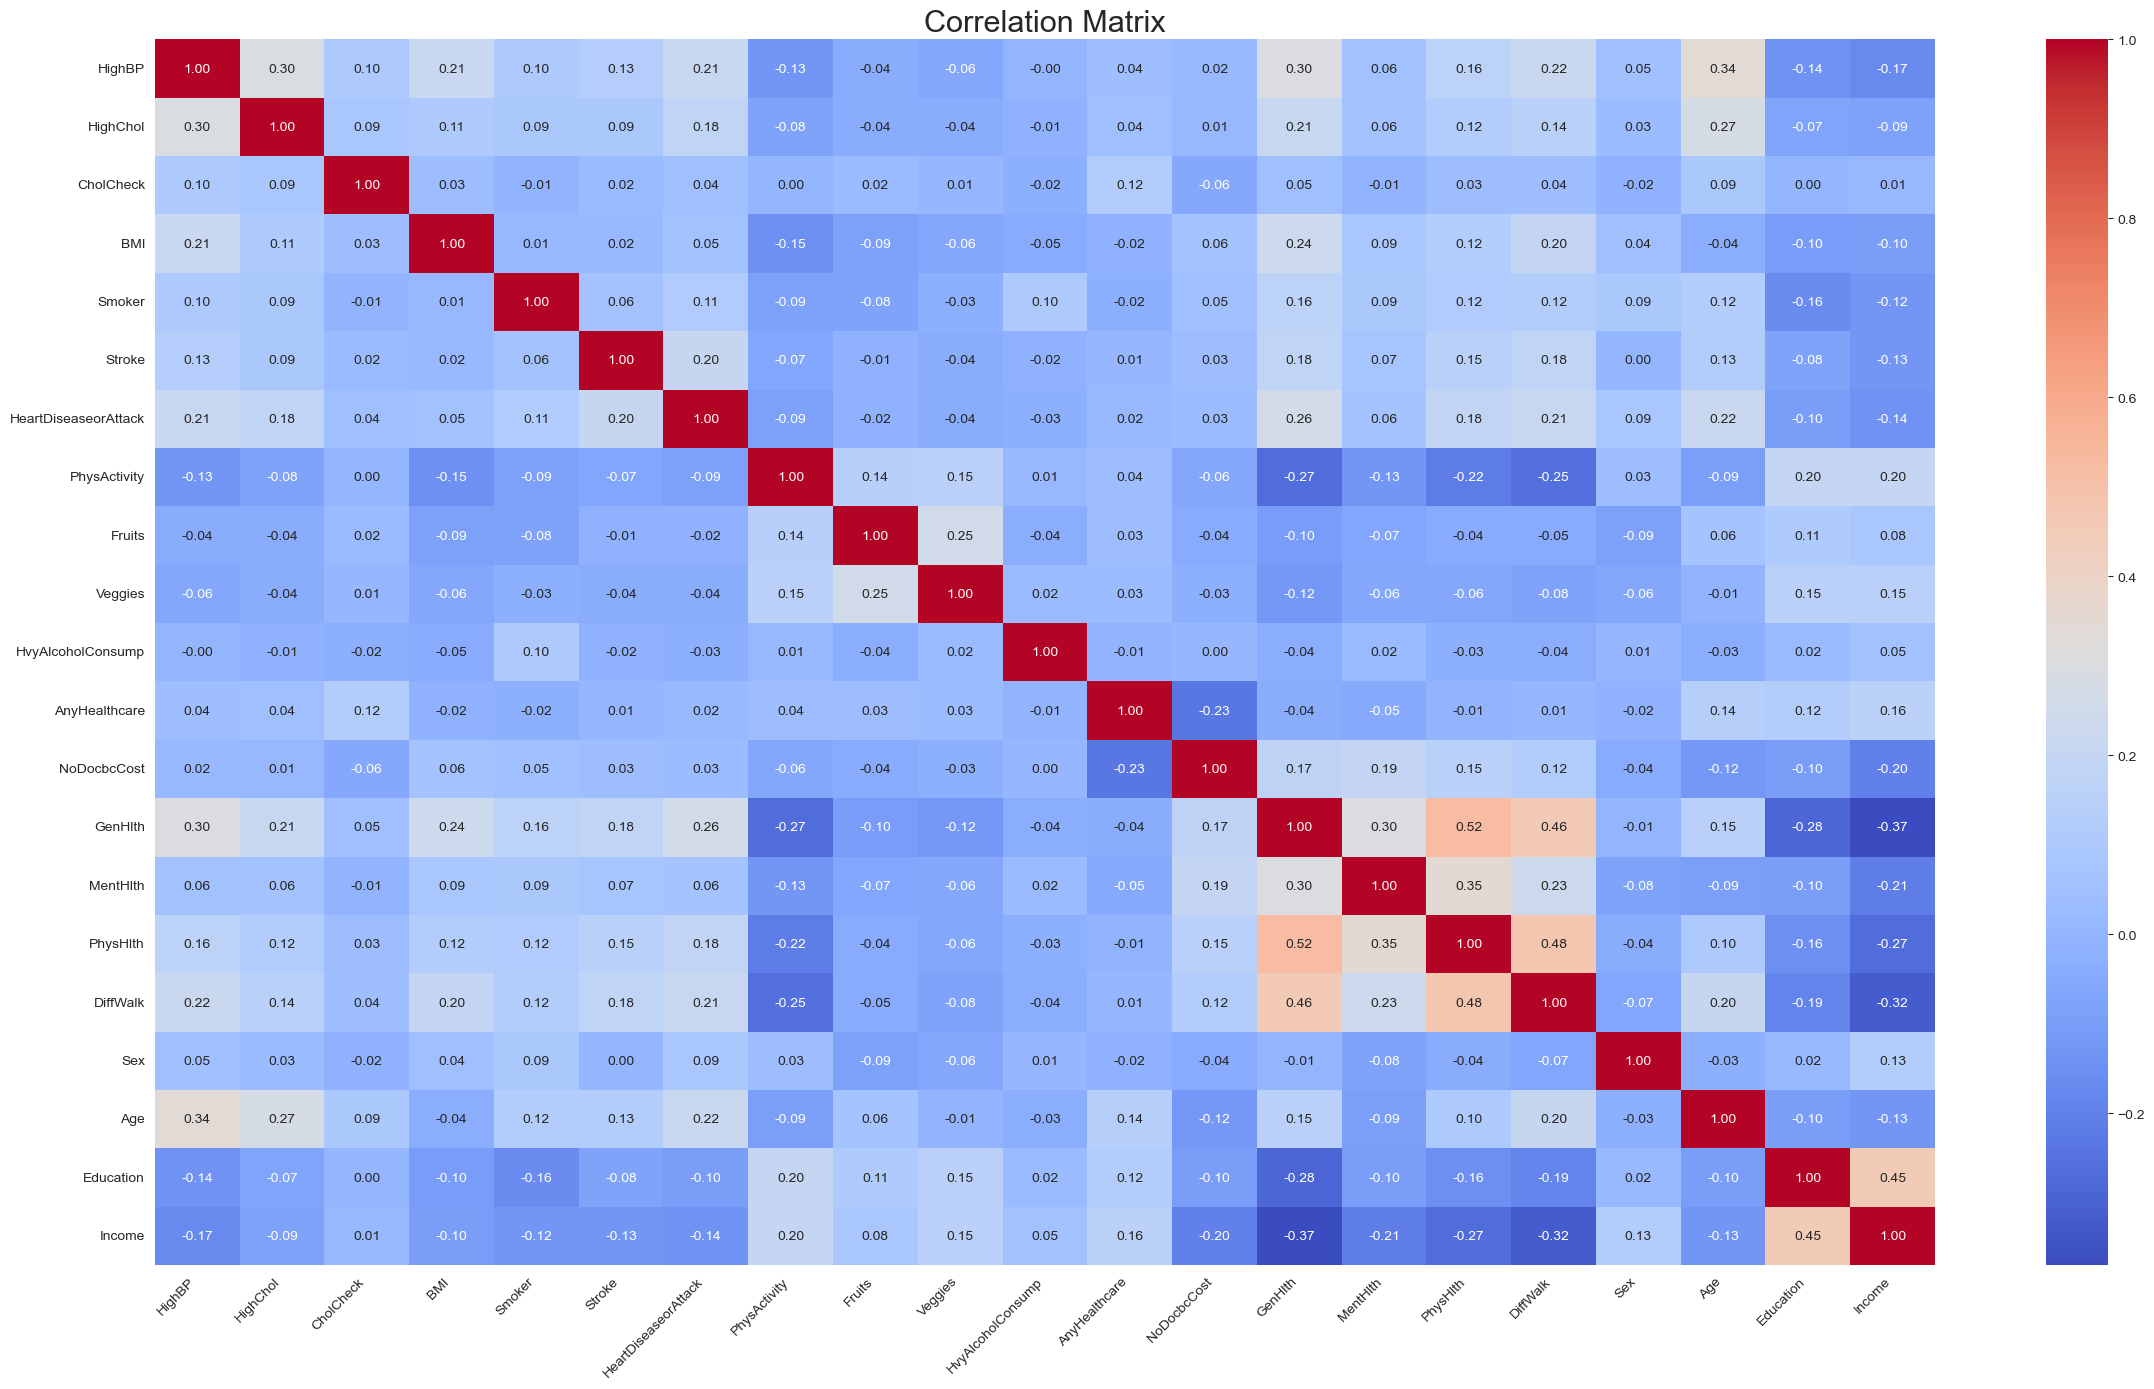

In [19]:
import seaborn as sns

correlation_matrix = x.corr()

plt.figure(figsize=(24, 14))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")

plt.title('Correlation Matrix', fontsize=22)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<br><br>

---

## Probability distribution analysis with histograms

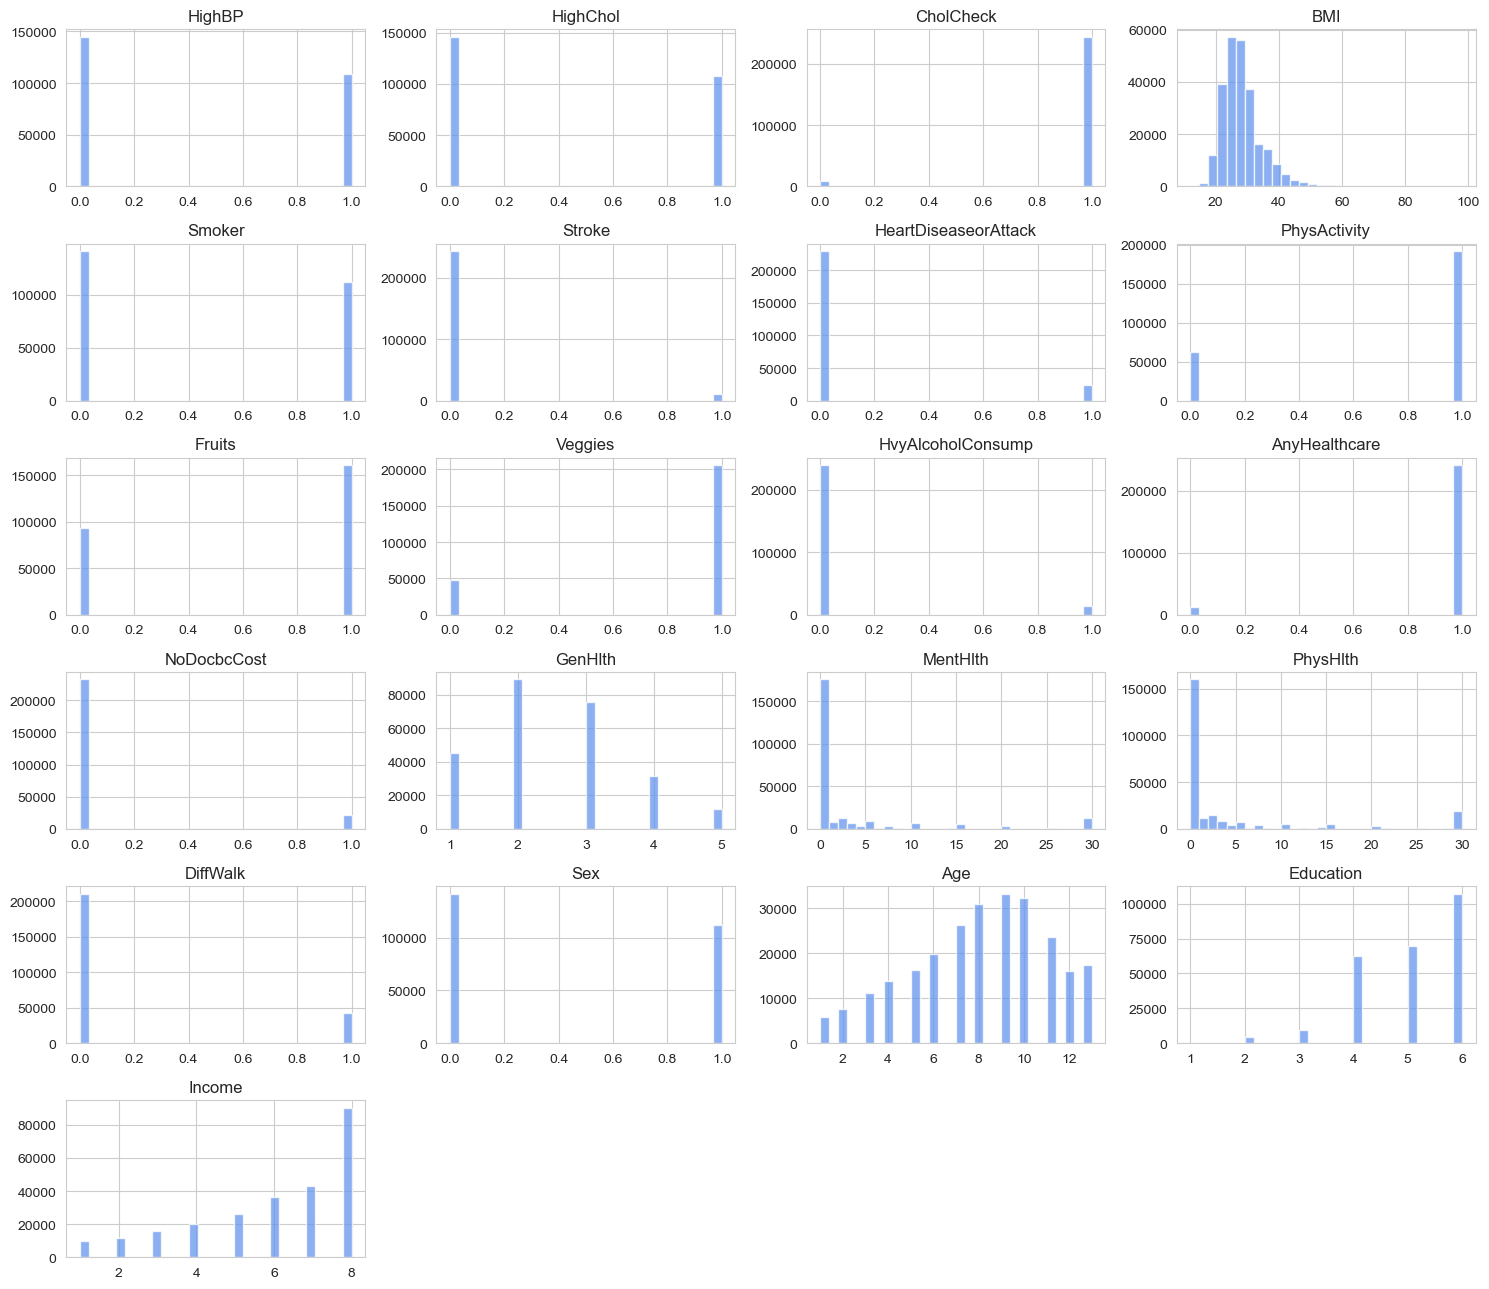

In [59]:
plt.figure(figsize=(15, 13))

for i, column in enumerate(x.columns, 1):
    plt.subplot(6, 4, i)
    plt.hist(x[column], bins=30, color='cornflowerblue', alpha=0.75)
    plt.title(column)
    plt.tight_layout()
    if x[column].nunique == 2:
        plt.xticks([0, 1])

plt.show()

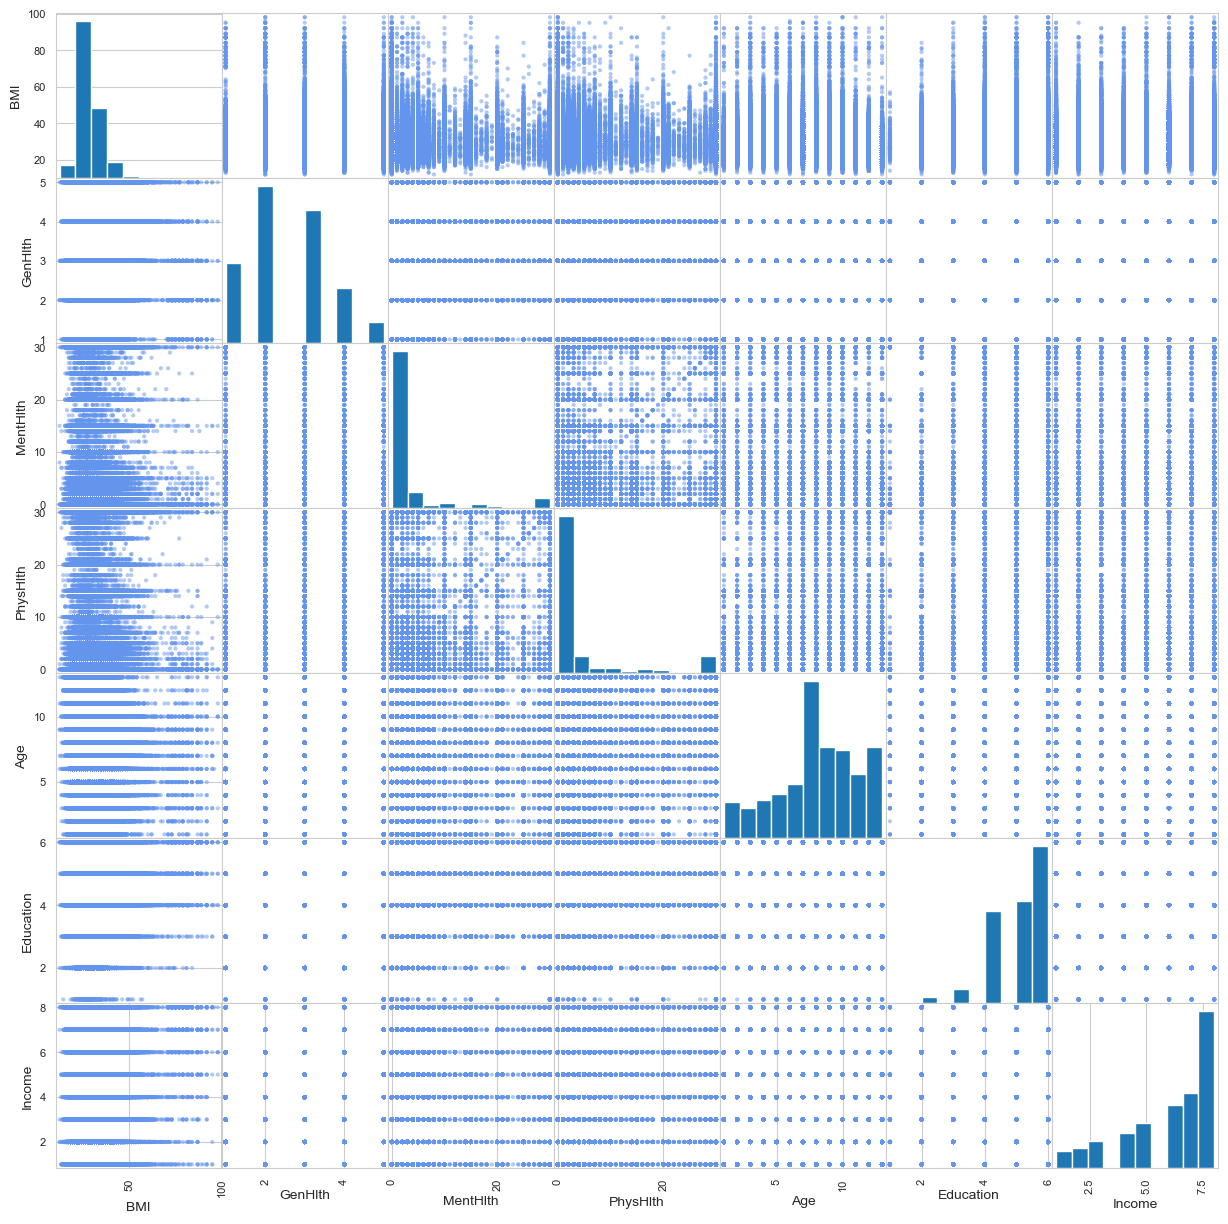

In [66]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix


binary_columns = [col for col in x.columns if x[col].nunique() == 2]
non_binary_data = x.drop(columns=binary_columns)
pd.plotting.scatter_matrix(non_binary_data, figsize=(15, 15), diagonal='hist', color='cornflowerblue')
plt.show()

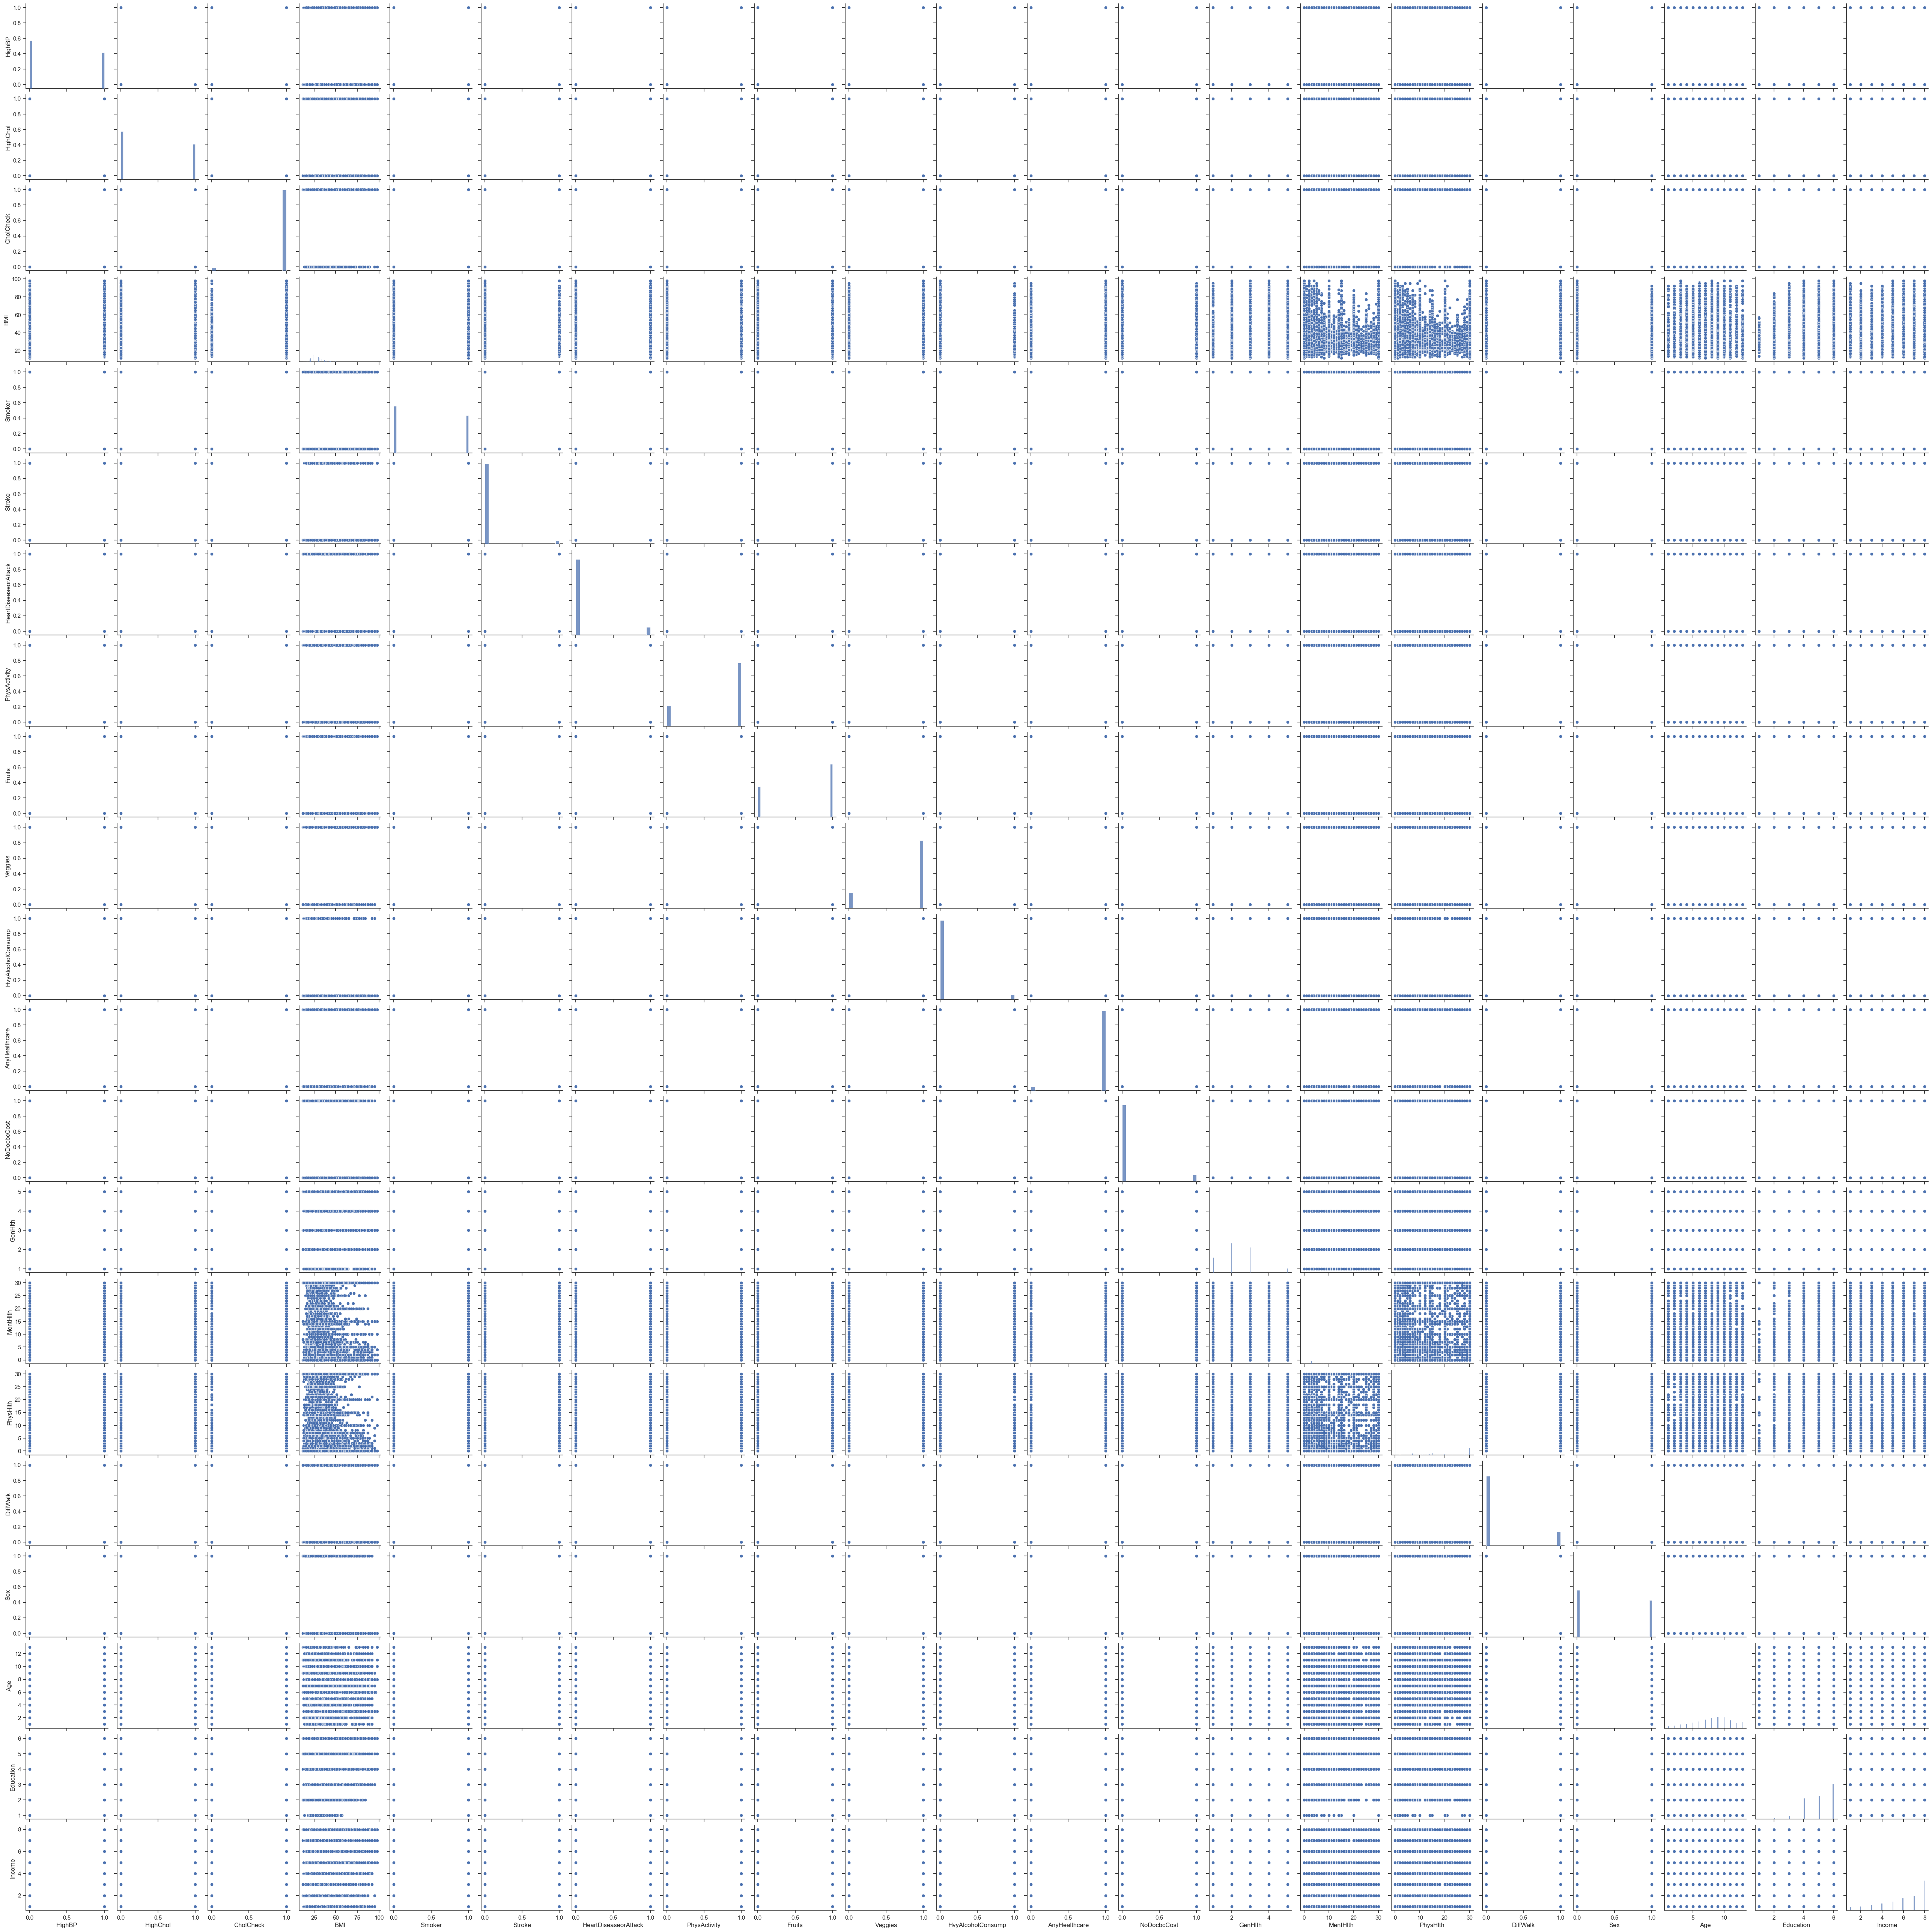

In [75]:
import seaborn as sns
sns.pairplot(x, diag_kind='hist')